In [74]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName("notebook").enableHiveSupport().getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/30 21:51:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark.sql("show tables").show(10, False)

+---------+-----------------------------------------+-----------+
|namespace|tableName                                |isTemporary|
+---------+-----------------------------------------+-----------+
|default  |app_data_norm                            |false      |
|default  |app_store_data_norm                      |false      |
|default  |app_store_raw                            |false      |
|default  |application_size_distribution_by_category|false      |
|default  |avg_rating_by_category                   |false      |
|default  |new_releases_by_month_and_category       |false      |
|default  |play_store_data_norm                     |false      |
|default  |play_store_raw                           |false      |
|default  |top_10_largest_apps_by_category          |false      |
+---------+-----------------------------------------+-----------+



In [4]:
df = spark.sql("select * from avg_rating_by_category").toPandas()

In [7]:
df.head

<bound method NDFrame.head of    rating_avg cat_norm
0         4.8    MUSIC
1         4.6     GAME
2         4.8   HEALTH>

<AxesSubplot: xlabel='cat_norm', ylabel='rating_avg'>

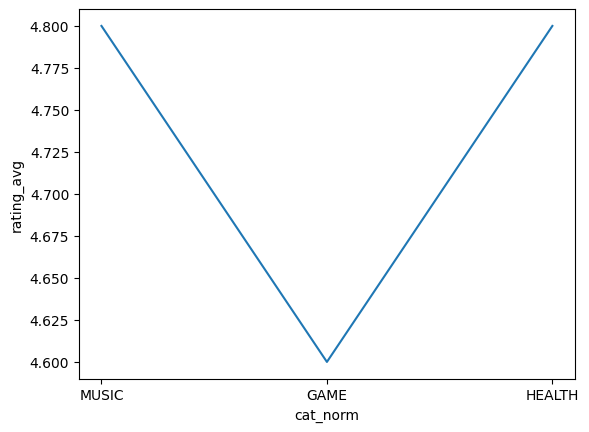

In [8]:
sns.lineplot(x = "cat_norm", y = "rating_avg", data = df)

In [114]:
df = spark.sql("select * from application_size_distribution_by_category where app_sz_mb_1000 > 0 and app_sz_mb_1000 <= 10000").toPandas()

In [115]:
df.head()

,bucket_count,app_sz_mb_1000,cat_norm
0,5570,1000.0,GAME
1,597,2000.0,GAME
2,185,3000.0,GAME
3,71,4000.0,GAME
4,8,5000.0,GAME


<AxesSubplot: xlabel='app_sz_mb_1000', ylabel='bucket_count'>

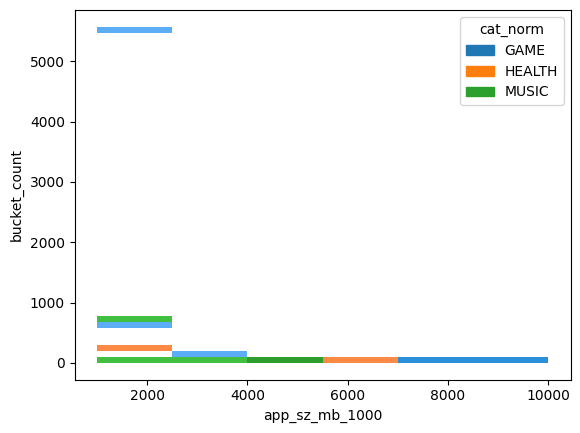

In [120]:
sns.histplot(x = "app_sz_mb_1000", y = "bucket_count", hue = "cat_norm", data = df)

In [121]:
df = spark.sql("select * from new_releases_by_month_and_category").toPandas()

In [31]:
df.dtypes

cat_norm             object
new_release_count     int64
release_year          int32
release_month         int32
dtype: object

<AxesSubplot: xlabel='release_month', ylabel='new_release_count'>

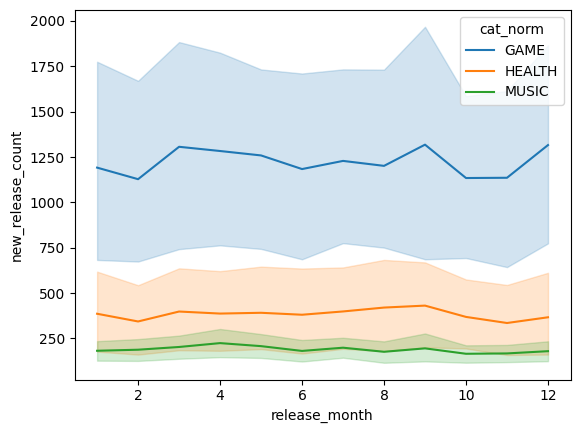

In [122]:
sns.lineplot(x = "release_month", y = "new_release_count", hue="cat_norm", data = df)